# EDA Process
<hr style="border:2px solid black">

- This notebook serves to read and join the tables from different data set.
- The reader is expected to run the codes and try to understand the contents of the data files

In [1]:
## A tagline is a short description or comment on a movie that is displayed on movie posters (or direct to video covers, etc.) to capture the essence of the movie, and ultimately make you watch the movie.

#### Ideas for joining the Tables
- ???

#### load packages

In [2]:
# !pip install mplcyberpunk

In [1]:
import sys

import io
import matplotlib.pyplot as plt
import mplcyberpunk\
# data analysis stack
import numpy as np
import pandas as pd

import time
import tkinter as tk


# data visualization stack
import seaborn as sns
import matplotlib.pyplot as plt
# import missingno as msno

%matplotlib inline
# import seaborn as sns
# sns.set_style('whitegrid')

# for data cleaning
from sklearn.impute import KNNImputer


# miscellaneous
import warnings
warnings.filterwarnings("ignore")


# Set display
pd.set_option('display.max_columns', None)

#### load data, Second data set from
https://grouplens.org/datasets/movielens/

In [40]:
df_ml_32m_rating = pd.read_csv('./data/ml-latest-small/ratings.csv')

In [54]:
df_ml_32m_links = pd.read_csv('./data/ml-latest-small/links.csv')

In [62]:
df_ml_32m_movies = pd.read_csv('./data/ml-latest-small/movies.csv')

In [12]:
# df_ml_32m_tags = pd.read_csv('./data/ml-latest-small/tags.csv')

#### ***Data Cleaning of Data Sets***
***Table Rating***

In [14]:
# df_ml_32m_rating.info()
# no missing value found

In [17]:
# # here we convert the seconds (in timestamp column) into real time-stamp
# from datetime import datetime

# # Convert seconds to a datetime object
# for i in range(len(df_ml_32m_rating.timestamp)):
#     df_ml_32m_rating.loc[i, 'time_stamp'] = datetime.fromtimestamp(df_ml_32m_rating.loc[i, 'timestamp']) 

In [18]:
# # now droppingh inplace the old timestamp col and rename the new one 
# df_ml_32m_rating = df_ml_32m_rating.drop('timestamp', axis = 1, inplace = False)  

In [43]:
# unique movieIds
movie_ids = df_ml_32m_movies.movieId.unique()
print(movie_ids)

# Define mapping
mapping_dict = {int(j): int(i) for i, j in enumerate(movie_ids)} # i runs over the index and j runs over the enteries (movie_ids)

# Apply mapping
df_ml_32m_rating.movieId = df_ml_32m_rating.movieId.map(mapping_dict)
df_ml_32m_rating.movieId.unique()

[     1      2      3 ... 193585 193587 193609]


array([   0,    2,    5, ..., 9342, 9389, 9390], dtype=int64)

In [45]:
df_ml_32m_rating = df_ml_32m_rating.drop('timestamp', axis = 1)

In [73]:
df_ml_32m_rating.to_csv('./data/ml-latest-small/ratings_cleaned.csv')

#### ***Data Cleaning of Data Sets***
***Table Links***

In [55]:
df_ml_32m_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [56]:
df_ml_32m_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [57]:
# HEre we define a imputation model to impute the table links

knn_imputer = KNNImputer()
knn_imputer.fit(df_ml_32m_links[['tmdbId']])
df_ml_32m_links['tmdbId'] = knn_imputer.transform( df_ml_32m_links[['tmdbId']] ).flatten()

In [58]:
df_ml_32m_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9742 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [59]:
df_ml_32m_links = df_ml_32m_links.drop('imdbId', axis = 1)

In [60]:
# Apply mapping
df_ml_32m_links.movieId = df_ml_32m_links.movieId.map(mapping_dict)
df_ml_32m_links.movieId.unique()

array([   0,    1,    2, ..., 9739, 9740, 9741], dtype=int64)

In [72]:
df_ml_32m_links.to_csv('./data/ml-latest-small/links_cleaned.csv')

#### ***Data Cleaning of Data Sets***
***Table Movie***

In [63]:
df_ml_32m_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [64]:
df_ml_32m_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [65]:
# HEre we try to divide a single title column into two columns, title and released year
import re

movies_no_yr = []
for i in range(len(df_ml_32m_movies.title)):

# # Sample string
    string = df_ml_32m_movies.loc[i, 'title']

# # Regular expression pattern to find a 4-digit year
    pattern = r'\b((19|20)\d{2}\b)'
    # pattern_yr_ps = r'\b(19|20)\d{2}\b'
# # Search for the pattern in the string
    match = re.search(pattern, string)
  

    if match:
        year = match.group()
        df_ml_32m_movies.loc[i, 'released_yr'] = int(year)
        df_ml_32m_movies.loc[i, 'title'] = df_ml_32m_movies.loc[i, 'title'].replace(f'({year})','')
#     print("Year found:", year)
    else:
        df_ml_32m_movies.loc[i, 'released_yr'] = 2000
        movies_no_yr.append(df_ml_32m_movies.loc[i,'title'])
        
movies_no_yr

['Babylon 5',
 'Ready Player One',
 'Hyena Road',
 'The Adventures of Sherlock Holmes and Doctor Watson',
 'Nocturnal Animals',
 'Paterson',
 'Moonlight',
 'The OA',
 'Cosmos',
 'Maria Bamford: Old Baby',
 'Generation Iron 2',
 'Black Mirror']

In [18]:
# df_ml_32m_movies.head()

In [66]:
# here we turn the column genres into a column of lists
df_ml_32m_movies.genres = df_ml_32m_movies.genres.str.split('|')
# now for each row we have alist of genres for each movies

In [65]:
# df_ml_32m_movies.released_yr.unique()

In [67]:
df_ml_32m_movies.head(5)

,movieId,title,genres,released_yr
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995.0
4,5,Father of the Bride Part II,[Comedy],1995.0


In [68]:
# Apply mapping
df_ml_32m_movies.movieId = df_ml_32m_movies.movieId.map(mapping_dict)
df_ml_32m_movies.movieId.unique()

array([   0,    1,    2, ..., 9739, 9740, 9741], dtype=int64)

In [69]:
df_ml_32m_movies.head(5)

,movieId,title,genres,released_yr
0,0,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0
1,1,Jumanji,"[Adventure, Children, Fantasy]",1995.0
2,2,Grumpier Old Men,"[Comedy, Romance]",1995.0
3,3,Waiting to Exhale,"[Comedy, Drama, Romance]",1995.0
4,4,Father of the Bride Part II,[Comedy],1995.0


In [70]:
# saving movie data set to a csv file

df_ml_32m_movies.to_csv('./data/ml-latest-small/movies_cleaned.csv')

#### ***Data Cleaning of Data Sets***
***Table Tags***

In [18]:
# # Here wes use drop the rows with simmilar values for userID and movieId for tag table
# df_ml_32m_tags_temp = df_ml_32m_tags.drop_duplicates(subset = ['userId','movieId'], ignore_index=True)

In [21]:
df_ml_32m_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [24]:
# here we convert teh seconds (in timestamp column) into real time-stamp
from datetime import datetime

# Convert seconds to a datetime object
for i in range(len(df_ml_32m_tags.timestamp)):
    df_ml_32m_tags.loc[i, 'time_stamp'] = datetime.fromtimestamp(df_ml_32m_tags.loc[i, 'timestamp'])


In [25]:
# now droppingh inplace the old timestamp col and rename the new one 
df_ml_32m_tags = df_ml_32m_tags.drop('timestamp', axis = 1, inplace = False)  

In [26]:
df_ml_32m_tags.head()

,userId,movieId,tag,time_stamp
0,2,60756,funny,2015-10-24 21:29:54
1,2,60756,Highly quotable,2015-10-24 21:29:56
2,2,60756,will ferrell,2015-10-24 21:29:52
3,2,89774,Boxing story,2015-10-24 21:33:27
4,2,89774,MMA,2015-10-24 21:33:20


#### ***Vizulization of Data Sets***
***Table Rating***

In [84]:
df_ml_32m_rating.head()

,userId,movieId,rating,time_stamp
0,1,1,4.0,2000-07-30 20:45:03
1,1,3,4.0,2000-07-30 20:20:47
2,1,6,4.0,2000-07-30 20:37:04
3,1,47,5.0,2000-07-30 21:03:35
4,1,50,5.0,2000-07-30 20:48:51


#### ***Distribution of Ratings***

ValueError: keyword fontweight is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

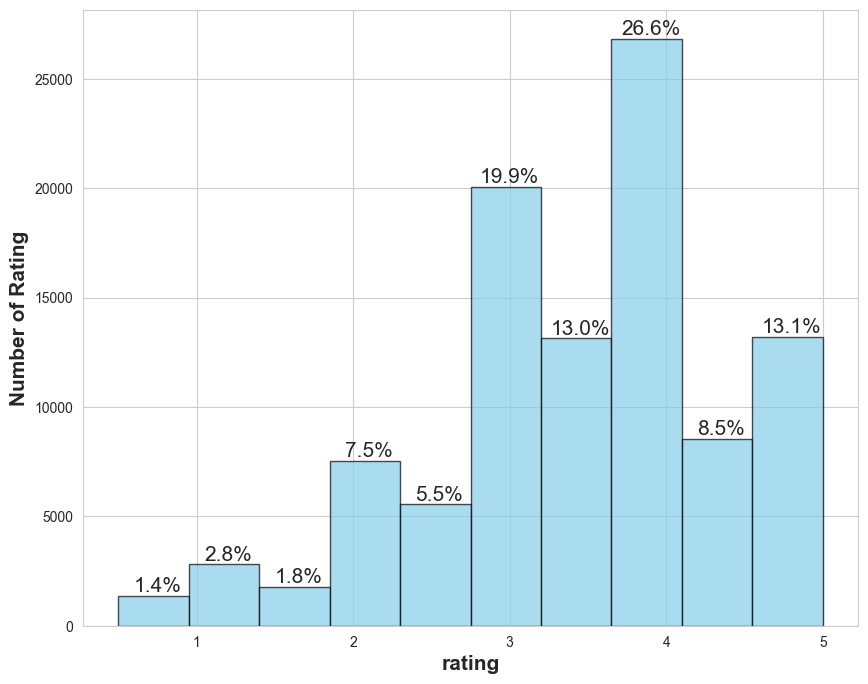

In [31]:
# distribution of Rating
sns.set_style("whitegrid")

n_rating = df_ml_32m_rating['rating'].nunique()

fig, ax0 = plt.subplots(1,1, figsize = (10,8))


n, bins, patches = plt.hist(df_ml_32m_rating['rating'], bins=n_rating, color='skyblue', edgecolor='black', alpha=0.7)

# Calculate total count for percentage calculation
total = n.sum()

# Annotate each bar with percentage
for count, bin_edge in zip(n, bins):
    # Calculate the position for each label
    percentage = (count / total) * 100
    plt.text(bin_edge + 0.25, count, f'{percentage:.1f}%', ha='center', va='bottom', fontsize = 15.0, fontweight = 10)
    
ax0.set_xlabel('Rating',  fontsize = 15.0, fontweight = 'bold')
ax0.set_ylabel('Number of Rating',  fontsize = 15.0, fontweight = 'bold')

ax0.tick_params(axis='both', which = 'both', direction = 'in', width = 3, length = 6, labelsize = 15, fontweight = 10)

ax0.spines['top'].set_linewidth(2)
ax0.spines['right'].set_linewidth(2)
ax0.spines['bottom'].set_linewidth(2)
ax0.spines['left'].set_linewidth(2)
plt.show()

#### ***Distribution of Rating Times***

In [51]:
df_ml_32m_rating['time_stamp'].value_counts().max()

128

1996 2018


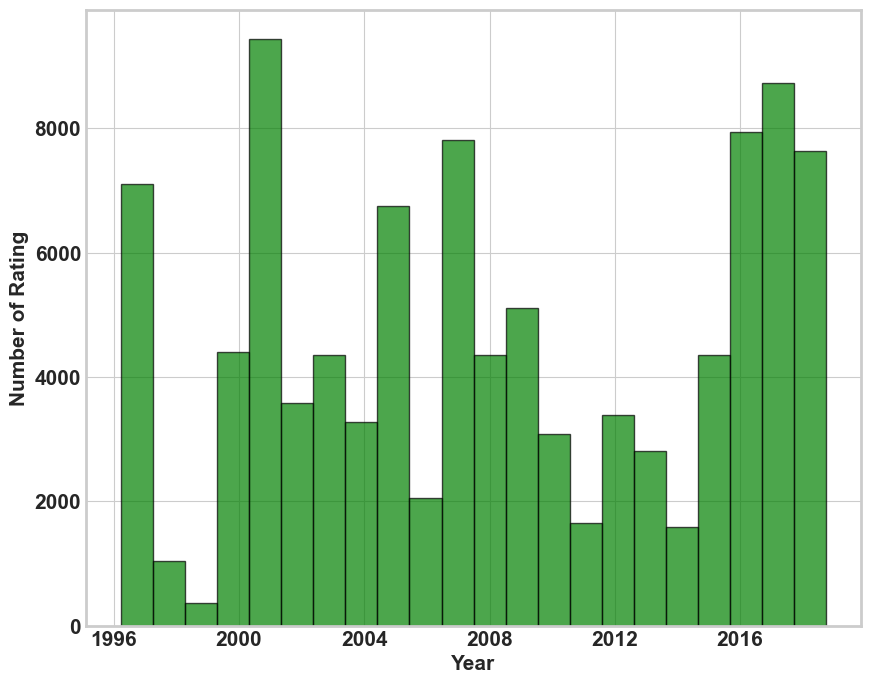

In [58]:
# distribution of timestamps

from datetime import datetime

print(df_ml_32m_rating['time_stamp'].min().year, df_ml_32m_rating['time_stamp'].max().year)
sns.set_style("whitegrid")
# number of year in the time period ratings are recorded
no_year = df_ml_32m_rating['time_stamp'].max().year - df_ml_32m_rating['time_stamp'].min().year
fig, ax0 = plt.subplots(1,1, figsize = (10,8))

df_ml_32m_rating['time_stamp'].hist(bins=no_year, color='green', edgecolor='black', alpha=0.7)

ax0.set_xlabel('Year',  fontsize = 15.0, fontweight = 'bold')
ax0.set_ylabel('Number of Rating',  fontsize = 15.0, fontweight = 'bold')

ax0.set_xticklabels(labels = [1996, 2000, 2004, 2008, 2012, 2016, 2020], fontsize = 15,  fontweight = 'bold')
ax0.set_yticklabels(labels = [0, 2000, 4000, 6000, 8000], fontsize = 15, fontweight = 'bold')

ax0.tick_params(axis='both', which = 'both', direction = 'in', width = 3, length = 6)

ax0.spines['top'].set_linewidth(2)
ax0.spines['right'].set_linewidth(2)
ax0.spines['bottom'].set_linewidth(2)
ax0.spines['left'].set_linewidth(2)
plt.show()

In [31]:
# # scatter plot of rates and moviId

# from datetime import datetime

# sns.set_style("whitegrid")

# fig, ax0 = plt.subplots(1,1, figsize = (10,8))

# sns.scatterplot(x=df_ml_32m_rating.groupby('movieId'), y='rating', data=df_ml_32m_rating)

# ax0.set_xlabel('Movies',  fontsize = 15.0, fontweight = 'bold')
# ax0.set_ylabel('Number of Rating',  fontsize = 15.0, fontweight = 'bold')

# ax0.tick_params(axis='both', which = 'both', direction = 'in', width = 3, length = 6)

# ax0.spines['top'].set_linewidth(2)
# ax0.spines['right'].set_linewidth(2)
# ax0.spines['bottom'].set_linewidth(2)
# ax0.spines['left'].set_linewidth(2)
# plt.show()

In [14]:
df_ml_32m_rating.head(), df_ml_32m_rating.movieId.nunique()

(   userId  movieId  rating  timestamp
 0       1        1     4.0  964982703
 1       1        3     4.0  964981247
 2       1        6     4.0  964982224
 3       1       47     5.0  964983815
 4       1       50     5.0  964982931,
 9724)

#### ***Distribution of Number of Movies vs Number of Rating per Movie***

In [ ]:
# hist plot of number of rates per movies

df_ml_32m_rating_gb = df_ml_32m_rating.groupby('movieId')['rating'] #.count().clip(upper=100)
df_ml_32m_rating_gb

from datetime import datetime

sns.set_style("whitegrid")

fig, ax0 = plt.subplots(1,1, figsize = (10,8))

df_ml_32m_rating_gb.hist(bins=50, color='green', edgecolor='black', alpha=0.7)

ax0.set_xlabel('Number of Rating',  fontsize = 15.0, fontweight = 'bold')
ax0.set_ylabel('Number of Movies',  fontsize = 15.0, fontweight = 'bold')

ax0.tick_params(axis='both', which = 'both', direction = 'in', width = 3, length = 6)

plt.text(bin_edge + 0.25, count, f'{percentage:.1f}%', ha='center', va='bottom', fontsize = 15.0, fontweight = 10)

ax0.spines['top'].set_linewidth(2)
ax0.spines['right'].set_linewidth(2)
ax0.spines['bottom'].set_linewidth(2)
ax0.spines['left'].set_linewidth(2)
plt.show()

NameError: name 'bin_edge' is not defined

In [30]:
df_ml_32m_rating_gb.reset_index().sort_values('rating', ascending=False)[:10]

,movieId,rating
0,1,100
197,231,100
4131,5952,100
1938,2571,100
3002,4022,100
1978,2628,100
2013,2683,100
706,924,100
2979,3996,100
694,912,100


#### ***Distribution of Number of Movies vs Number of Rating User***

AttributeError: Text.set() got an unexpected keyword argument 'fontesize'

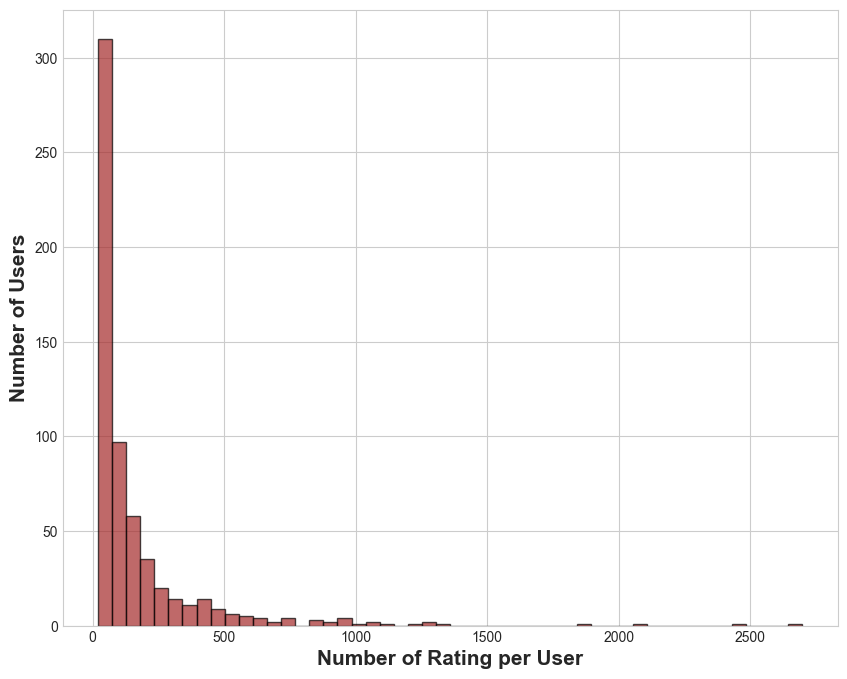

In [37]:
# hist plot of number of rates per movies

df_ml_32m_rating_gb_user = df_ml_32m_rating.groupby('userId')['rating'].count() #.clip(upper=100)
df_ml_32m_rating_gb

from datetime import datetime

sns.set_style("whitegrid")

fig, ax0 = plt.subplots(1,1, figsize = (10,8))

df_ml_32m_rating_gb_user.hist(bins=50, color='brown', edgecolor='black', alpha=0.7)

ax0.set_xlabel('Number of Rating per User',  fontsize = 15.0, fontweight = 'bold')
ax0.set_ylabel('Number of Users',  fontsize = 15.0, fontweight = 'bold')

ax0.tick_params(axis='both', which = 'both', direction = 'in', width = 3, length = 6)

# plt.xticks(rotation='vertical', fontesize = 15)

ax0.spines['top'].set_linewidth(2)
ax0.spines['right'].set_linewidth(2)
ax0.spines['bottom'].set_linewidth(2)
ax0.spines['left'].set_linewidth(2)
plt.show()

In [27]:
df_ml_32m_rating_gb_user.reset_index().sort_values('rating', ascending=False)[:10]

,userId,rating
413,414,2698
598,599,2478
473,474,2108
447,448,1864
273,274,1346
609,610,1302
67,68,1260
379,380,1218
605,606,1115
287,288,1055


#### ***Dimensionalty Reduction***
To reduce the dimensionality of the data set, and avoid running into “memory error”, we will filter out rarely rated books (rated less than 20) and rarely rating users (rated below 20 movies).

In [61]:
min_movie_ratings = 20
filter_movies = df_ml_32m_rating['movieId'].value_counts() > min_movie_ratings
filter_movies = filter_movies[filter_movies].index.tolist()

min_user_ratings = 20
filter_users = df_ml_32m_rating['userId'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

df_ml_32m_rating_red = df_ml_32m_rating[(df_ml_32m_rating['movieId'].isin(filter_movies)) & (df_ml_32m_rating['userId'].isin(filter_users))]
print('The original data frame shape:\t{}'.format(df_ml_32m_rating.shape))
print('The new data frame shape:\t{}'.format(df_ml_32m_rating_red.shape))

df_ml_32m_rating_red.to_csv(('./data/ml-latest-small/ratings_red.csv'))

The original data frame shape:	(100836, 5)
The new data frame shape:	(66405, 5)


#### ***Vizulization of Data Sets***
***Table Movies***

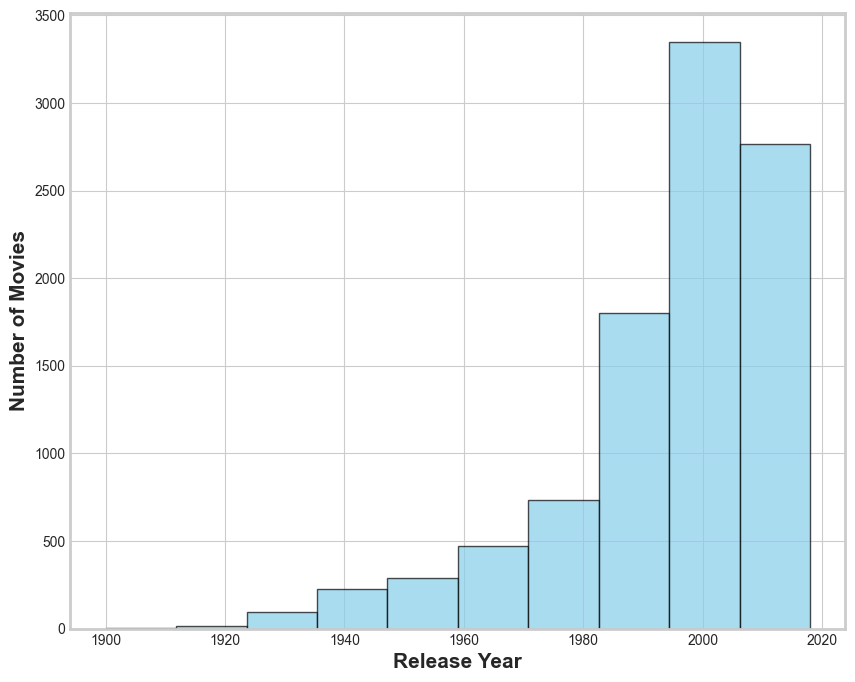

In [93]:
# Distribution of Released year
sns.set_style("whitegrid")

fig, ax0 = plt.subplots(1,1, figsize = (10,8))

df_ml_32m_movies['release_yr'].hist(bins=10, color='skyblue', edgecolor='black', alpha=0.7)

ax0.set_xlabel('Release Year',  fontsize = 15.0, fontweight = 'bold')
ax0.set_ylabel('Number of Movies',  fontsize = 15.0, fontweight = 'bold')

ax0.tick_params(axis='both', which = 'both', direction = 'in', width = 3, length = 6)

ax0.spines['top'].set_linewidth(2)
ax0.spines['right'].set_linewidth(2)
ax0.spines['bottom'].set_linewidth(2)
ax0.spines['left'].set_linewidth(2)
plt.show()




In [40]:
# df_ml_32m_movies_genres_flatten = df_ml_32m_movies.genres.explode().astype(str)

# df_ml_32m_movies_genres_flatten.unique()

In [39]:
# df_ml_32m_movies_genres_flatten.value_counts()

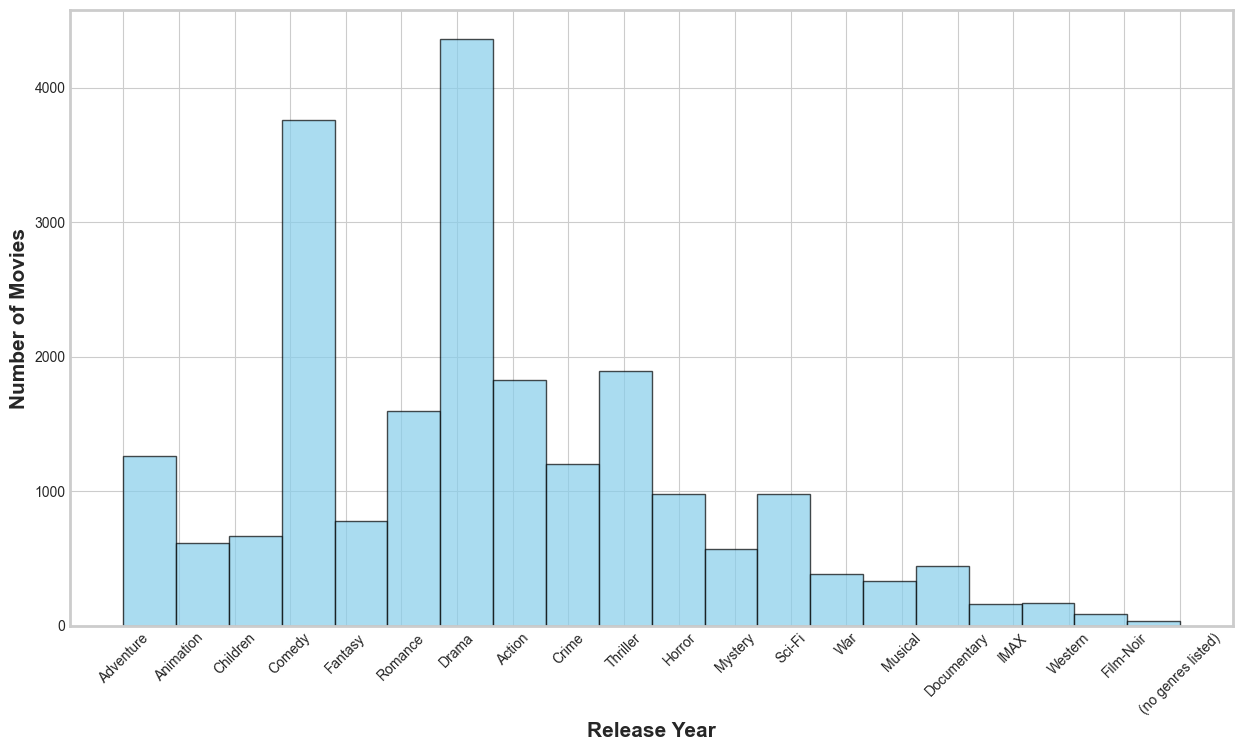

In [41]:
# plotting a histogram of genres of movies
sns.set_style("whitegrid")
#
df_ml_32m_movies_genres_flatten = df_ml_32m_movies.genres.explode().astype(str)

n_genres = df_ml_32m_movies_genres_flatten.nunique()

fig, ax0 = plt.subplots(1,1, figsize = (15,8))


df_ml_32m_movies_genres_flatten.hist(bins = n_genres, color='skyblue', edgecolor='black', alpha=0.7)

ax0.set_xlabel('Release Year',  fontsize = 15.0, fontweight = 'bold', )
ax0.set_ylabel('Number of Movies',  fontsize = 15.0, fontweight = 'bold')

ax0.tick_params(axis='both', which = 'both', direction = 'in', width = 3, length = 6)

plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

ax0.spines['top'].set_linewidth(2)
ax0.spines['right'].set_linewidth(2)
ax0.spines['bottom'].set_linewidth(2)
ax0.spines['left'].set_linewidth(2)
plt.show()

#### ***Vizulization of Data Sets***
***Table Movies***\
***Plotting the 10 most rated movies***

In [108]:
# make a groupby and count method to list movies in terms of how many times rated. 
rating_per_movie = df_ml_32m_rating.groupby('movieId')['rating'].count()
ave_rating_per_movie = df_ml_32m_rating.groupby('movieId')['rating'].mean()

In [109]:
# select the movies with number of rating over 200 times
most_rated_movie=rating_per_movie.loc[rating_per_movie>200]
ave_rate_movie=ave_rating_per_movie.loc[ave_rating_per_movie>3.5]

# order the serie values decending 
most_rated_movie = most_rated_movie.sort_values(ascending=False)
ave_rate_movie = ave_rate_movie.sort_values(ascending=False)
# now get the index (movieId) so that later find the corresponding titles in the movie table.
most_rated_movie_index = most_rated_movie.index
ave_rate_movie_index = ave_rate_movie.index

In [115]:
ave_rate_movie, ave_rate_movie[4816]

(movieId
 149566    5.000000
 86668     5.000000
 2512      5.000000
 162344    5.000000
 142020    5.000000
             ...   
 4816      3.509259
 70        3.509091
 34162     3.508621
 45722     3.506944
 2011      3.505747
 Name: rating, Length: 3768, dtype: float64,
 3.509259259259259)

In [77]:
# here we get the titles from the movie table using the index of most rated movies.
most_rated_movie_titles = df_ml_32m_movies[df_ml_32m_movies['movieId'].isin(most_rated_movie_index)]['title'].tolist()  #['title'][movieId == most_rated_movie_index]

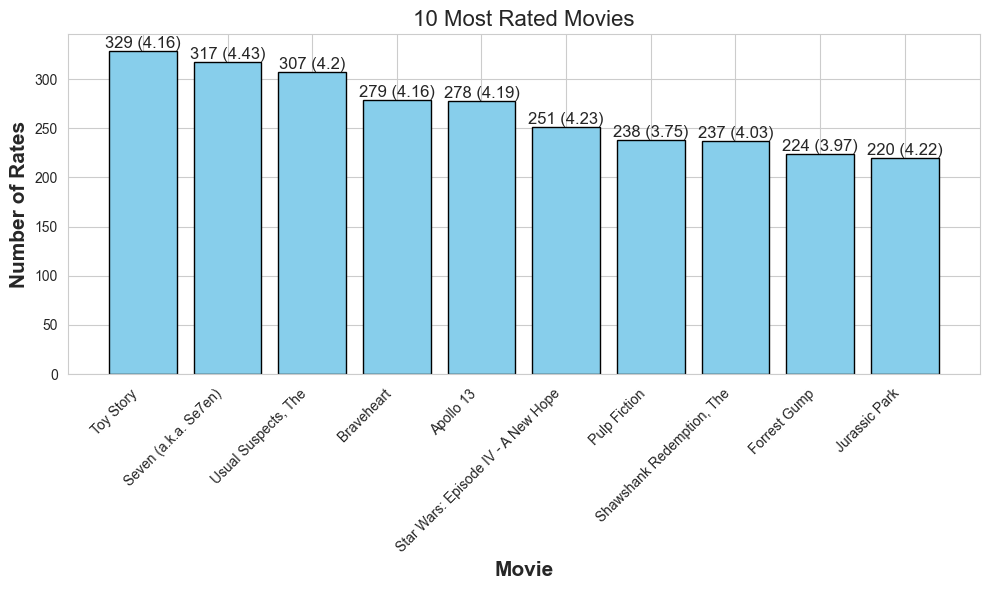

In [119]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
# data = {
#     'Fruits': ['Apples', 'Bananas', 'Cherries', 'Dates', 'Figs'],
#     'Quantity': [25, 40, 15, 30, 10]
# }
# df = pd.DataFrame(data)

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Set figure size
bars = plt.bar(most_rated_movie_titles[:10], most_rated_movie[:10], color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('10 Most Rated Movies', fontsize=16)
plt.xlabel('Movie', fontsize=15.0, fontweight = 'bold')
plt.ylabel('Number of Rates', fontsize=15.0, fontweight = 'bold')

# Add value labels on top of each bar
i = 0
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position at center of bar
        bar.get_height(),                   # Y position at bar height
        f'{bar.get_height()} ({ave_rate_movie[most_rated_movie_index[i]].round(2)})',              # Text as bar height
        ha='center',                        # Center alignment for X
        va='bottom',                        # Bottom alignment for Y
        fontsize=12                         # Font size for clarity
    )
    i+=1
    
# Optional: Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

ax0.tick_params(axis='both', which = 'both', direction = 'in', width = 3, length = 6)


ax0.spines['top'].set_linewidth(2)
ax0.spines['right'].set_linewidth(2)
ax0.spines['bottom'].set_linewidth(2)
ax0.spines['left'].set_linewidth(2)

# Display the chart
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()


#### ***Vizulization of Data Sets***
***Table Movies***\
***Plotting the 10 top movies with highest rating average***

In [90]:
# make a groupby and count method to list movies in terms of how many times rated. 
rating_per_movie_ave = df_ml_32m_rating.groupby('movieId')['rating'].mean()

In [93]:
# select the movies with average rating over 3.5
popular_movie=rating_per_movie_ave.loc[rating_per_movie_ave>3.5]
# order the serie values decending 
popular_movie = popular_movie.sort_values(ascending=False)
# now get the index (movieId) so that later find the corresponding titles in the movie table.
popular_movie_index = popular_movie.index
len(popular_movie_index)

3768

In [100]:
pop_index = popular_movie_index[popular_movie_index.isin(most_rated_movie_index)]

In [102]:
len(pop_index)

17

In [103]:
# here we get the titles from the movie table using the index of most rated movies.
most_popular_movie_titles = df_ml_32m_movies[df_ml_32m_movies['movieId'].isin(pop_index)]['title'].tolist()

In [104]:
most_popular_movie_titles

['Toy Story ',
 'Seven (a.k.a. Se7en) ',
 'Usual Suspects, The ',
 'Braveheart ',
 'Apollo 13 ',
 'Star Wars: Episode IV - A New Hope ',
 'Pulp Fiction ',
 'Shawshank Redemption, The ',
 'Forrest Gump ',
 'Jurassic Park ',
 "Schindler's List ",
 'Terminator 2: Judgment Day ',
 'Silence of the Lambs, The ',
 'Star Wars: Episode V - The Empire Strikes Back ',
 'Matrix, The ',
 'American Beauty ',
 'Fight Club ']

In [106]:
most_popular_movie_titles = rating_per_movie_ave[rating_per_movie_ave['movieId'].isin(pop_index)]['title'].tolist()

KeyError: 'movieId'